# ***Machine Learning Assignment 1 : Airbnb Prediction and Insights***

## Importing libraries

In [24]:
import pandas as pd
import joblib
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline   
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Exploration and Cleaning

In [25]:
# Loading the dataset
data= pd.read_excel(r"C:\Users\jpran\Downloads\Airbnb_data.xlsx")
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",18-06-2016,t,t,NaN,26-03-2012,f,18-07-2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-05-08 00:00:00,t,f,1.0,19-06-2017,t,23-09-2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,30-04-2017,t,t,1.0,25-10-2016,t,14-09-2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,19-04-2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-12-05 00:00:00,t,t,1.0,2015-01-03 00:00:00,t,22-01-2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [26]:
# Displaying the shape and info of the dataset
print('Shape of the dataset:', data.shape)
data.info()

Shape of the dataset: (74111, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host

In [27]:
# Describing the dataset
data.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [28]:
# Data Cleaning & Feature Engineering
data['log_price'] = data['log_price'].fillna(data['log_price'].median())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())
data['beds'] = data['beds'].fillna(data['beds'].median())
data['host_response_rate'] = data['host_response_rate'].fillna('0%')
data['host_response_rate'] = data['host_response_rate'].astype(str).str.rstrip('%').astype(float) / 100
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['amenities'] = data['amenities'].fillna('{}')
data['amenities_count'] = data['amenities'].apply(lambda x: len(x.strip('{}').split(',')))
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['host_years'] = pd.Timestamp('2023-01-01').year - data['host_since'].dt.year.fillna(2023)
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].median())
data['number_of_reviews'] = data['number_of_reviews'].fillna(0)
data['cleaning_fee'] = data['cleaning_fee'].map({True: 1, False: 0})
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t': 1, 'f': 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

In [29]:
# Drop unnecessary columns
drop_columns = ['amenities', 'first_review', 'last_review', 'host_since', 'zipcode', 'thumbnail_url', 'description']
data.drop(columns=drop_columns, inplace=True)

#### Visualization

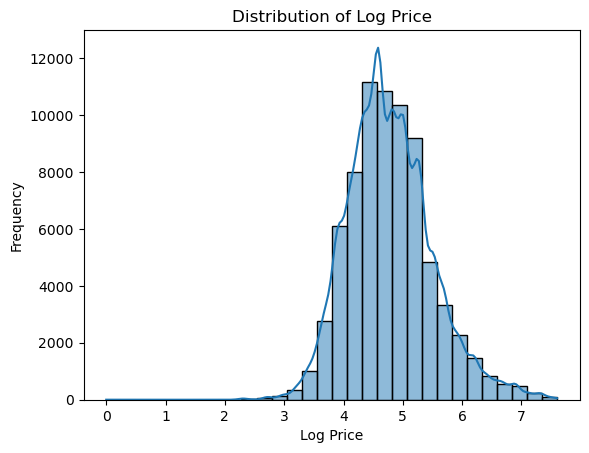

In [30]:
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price') 
plt.ylabel('Frequency')
plt.show()

##### Insights
- The histogram shows a normal distribution of Airbnb log_price values, centered around 4.8.
- This indicates most listings fall within a predictable price range, which is good for regression modeling.



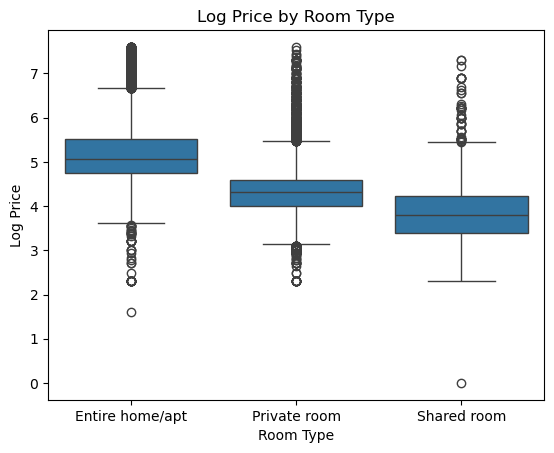

In [31]:
sns.boxplot(x=data['room_type'], y=data['log_price'])
plt.title('Log Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price') 
plt.show()

##### Insights
- This boxplot compares price distributions across room types.
- Entire home/apt listings clearly have the highest median prices, while shared rooms are the cheapest.

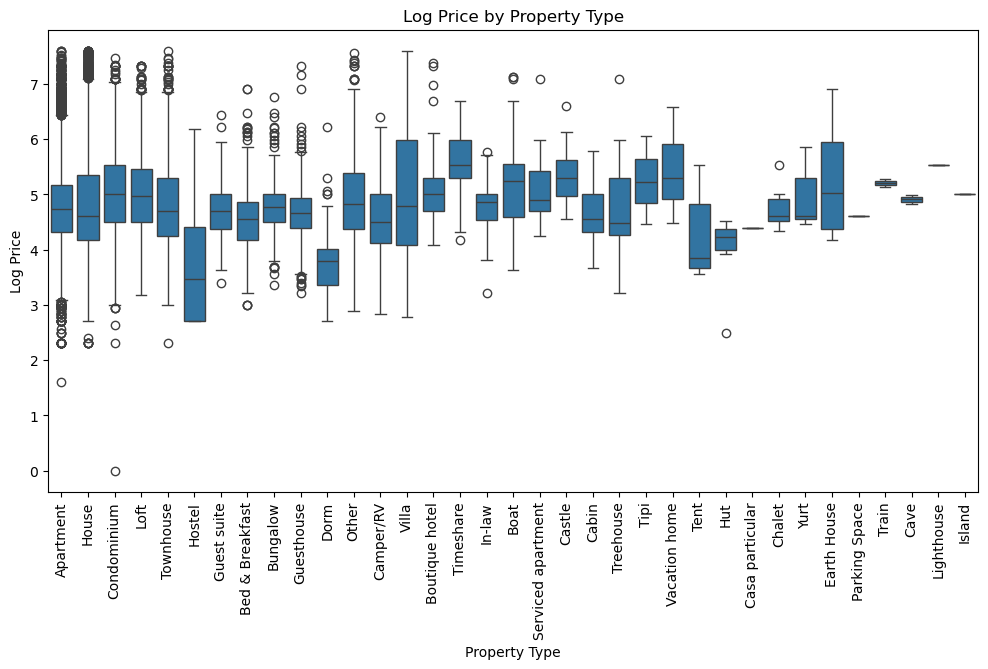

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['property_type'], y=data['log_price'])
plt.title('Log Price by Property Type')
plt.xlabel('Property Type') 
plt.ylabel('Log Price')
plt.xticks(rotation=90)
plt.show()

##### Insights
- This boxplot compares price distributions across room types.
- Entire home/apt listings clearly have the highest median prices, while shared rooms are the cheapest.



In [33]:
# Handling outliers in log_price using IQR method
q1 = data['log_price'].quantile(0.25)
q3 = data['log_price'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
data = data[(data['log_price'] >= lower) & (data['log_price'] <= upper)]

### Summary
- Filled missing values using **median imputation**.
- Engineered features like **host_years** and **amenities_count**
- Converted booleans to numeric and handled outliers using **IQR method**
- Dropped irrelevant or high-cardinality text columns


## Preprocessing and Splitting

In [34]:
X = data.drop(columns=['log_price'])
y = data['log_price']

In [35]:
# Select features and target

# Categories with high cardinality will be dropped
categorical_cols = []
high_cardinality_cols = []
for col in X.select_dtypes(include=['object', 'category']).columns:
    if X[col].nunique() <= 20:
        categorical_cols.append(col)
    else:
        high_cardinality_cols.append(col)

X = X.drop(columns=high_cardinality_cols)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Simple median imputation for any remaining missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Summary
- Selected **categorical columns** with **≤ 20 unique values** for one-hot encoding
- Dropped high-cardinality columns to avoid excessive dimensionality
- Used **SimpleImputer** for any remaining missing values
- Scaled data using **StandardScaler** and split into train-test sets
- Split data into training and testing sets with **train_test_split**.

## Modeling and Evaluation

In [39]:
# Creating a pipeline with preprocessing and model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': GridSearchCV(Ridge(random_state=42), 
                                    {'alpha': [0.1, 1, 10]}, cv=3, verbose=0),
    'Decision Tree': GridSearchCV(DecisionTreeRegressor(random_state=42), 
                                 {'max_depth': [5, 10, 15]}, cv=3),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GridSearchCV(GradientBoostingRegressor(random_state=42), 
                                      {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}, cv=3),
    'XGBoost': GridSearchCV(XGBRegressor(random_state=42),
                            {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [4, 6],'subsample': [0.8, 1.0]})
}
                            

results = {}
best_models = {}

In [40]:
# Fitting models and evaluating performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    best_models[name] = model

result_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(result_df)

                       RMSE       MAE        R2
XGBoost            0.355838  0.266566  0.704374
Random Forest      0.359888  0.268100  0.697607
Gradient Boosting  0.370379  0.279657  0.679720
Decision Tree      0.394232  0.296301  0.637138
Linear Regression  0.432254  0.333009  0.563770
Ridge Regression   0.432617  0.333528  0.563039


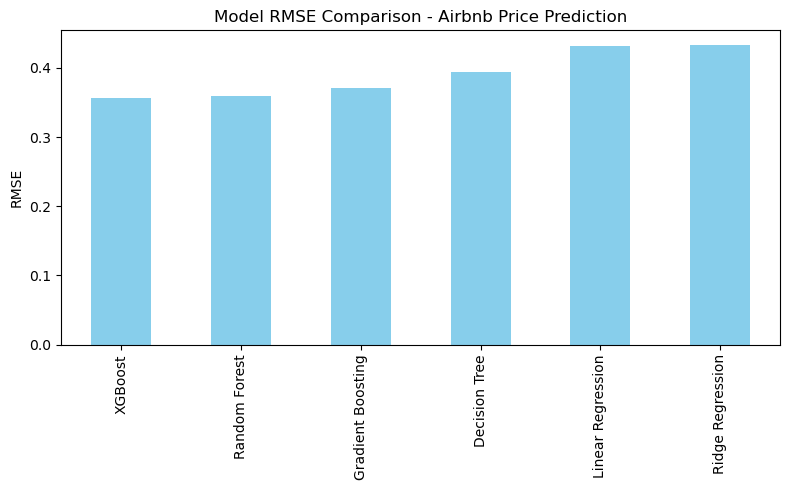

In [41]:
# Plot RMSE comparison
plt.figure(figsize=(8, 5))
result_df['RMSE'].plot(kind='bar', color='skyblue')
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison - Airbnb Price Prediction")
plt.tight_layout()
plt.show()

In [42]:
# Saving the best model
model_name = result_df.index[0]
final_model = best_models[model_name]
joblib.dump(final_model, "final_airbnb_model.pkl")
print(f"Best model saved as 'final_airbnb_model.pkl' ({model_name})")

Best model saved as 'final_airbnb_model.pkl' (XGBoost)


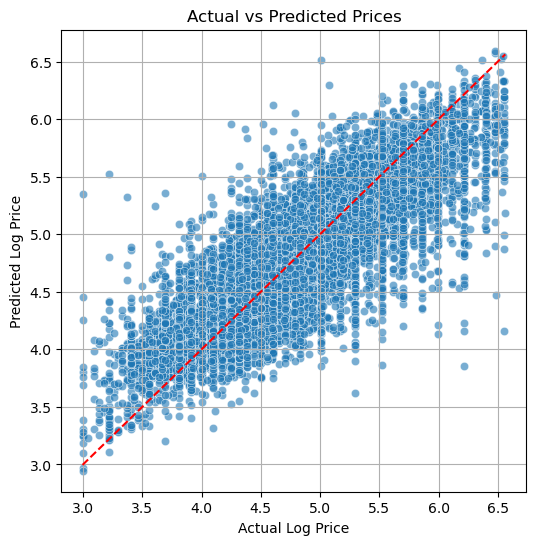

In [43]:
# Actual vs Predicted for XGBoost
y_pred_plot = final_model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_plot, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

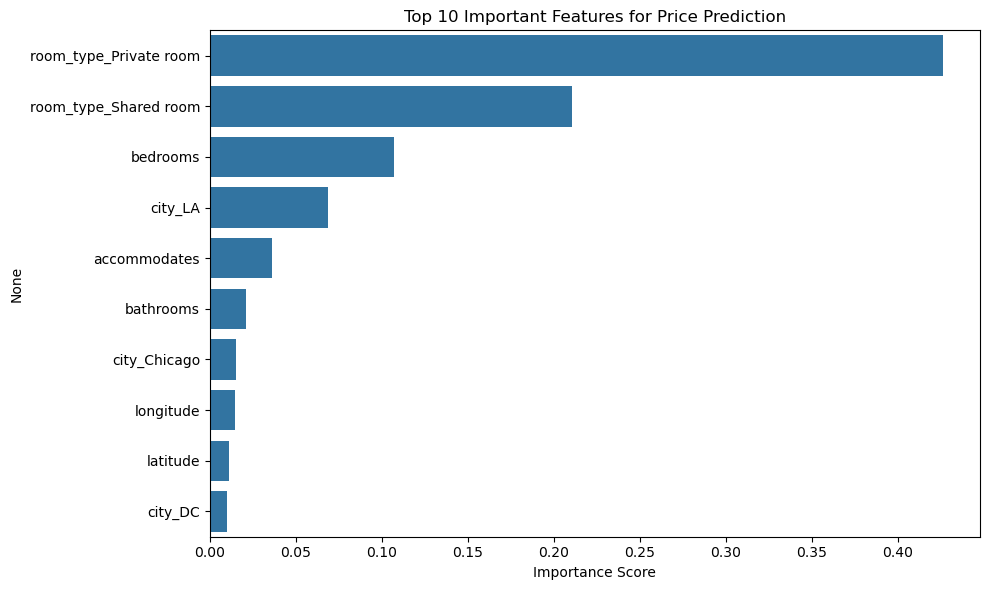

In [47]:
#feature importance for the best model
feature_importances = pd.Series(final_model.best_estimator_.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features for Price Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Summary
- Tested multiple regression models **(Linear, Ridge, Decision Tree, RF, GB, XGBoost)**
- Evaluated using **RMSE, MAE,** and **R2** on the test set
- Plotted top 10 **feature importances** for best model
- **XGBoost** selected as final model for its accuracy and robustness
- Saved the model and scaler using **joblib**

## Predicting New Listings

In [52]:
def predict_airbnb_price(filepath, model_path="final_airbnb_model.pkl", 
                         scaler_path="scaler_airbnb.pkl",
                         output_path="airbnb_price_predictions.xlsx"):
    
    # Load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    # Read new data
    new_data = pd.read_excel(filepath)

    # Basic processing (only apply what's needed)
    new_data['cleaning_fee'] = new_data['cleaning_fee'].map({True: 1, False: 0, 't': 1, 'f': 0})
    new_data['review_scores_rating'] = new_data['review_scores_rating'].fillna(0)
    new_data['number_of_reviews'] = new_data['number_of_reviews'].fillna(0)
    
    if 'host_since' in new_data.columns:
        new_data['host_since'] = pd.to_datetime(new_data['host_since'], errors='coerce')
        new_data['host_years'] = pd.Timestamp('2023-01-01').year - new_data['host_since'].dt.year.fillna(2023)
    
    if 'amenities' in new_data.columns:
        new_data['amenities_count'] = new_data['amenities'].apply(lambda x: len(str(x).strip('{}').split(',')))
    elif 'amenities_count' not in new_data.columns:
        new_data['amenities_count'] = 0  # default

    # Define expected features from training
    expected_columns = [ 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 
                     'number_of_reviews', 'review_scores_rating', 'host_years', 'amenities_count',
                     'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room',
                     'room_type_Shared room', 'property_type_Bungalow', 'property_type_House', 
                     'property_type_Other', 'property_type_Townhouse', 'property_type_Villa',
                     'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period',
                     'city_Boston', 'city_Chicago', 'city_DC', 'city_Los Angeles', 'city_NYC', 
                     'city_Portland', 'city_SF' ]
    # Categorical handling
    categorical_cols = []
    high_cardinality_cols = []
    for col in new_data.select_dtypes(include=['object', 'category']).columns:
        if new_data[col].nunique() <= 20:
            categorical_cols.append(col)
        else:
            high_cardinality_cols.append(col)

    new_data = new_data.drop(columns=high_cardinality_cols, errors='ignore')
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=expected_columns, fill_value=0)

    # Impute and scale
    new_data = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(new_data), columns=new_data.columns)
    new_data_scaled = scaler.transform(new_data)

    # Predict
    predictions = model.predict(new_data_scaled)
    new_data['Predicted_LogPrice'] = predictions

    # Save
    new_data.to_excel(output_path, index=False)
    print(f"✅ Predictions saved to: {output_path}")
    return new_data

In [53]:
predict_airbnb_price(r"C:\Users\jpran\Downloads\sample_airbnb_input.xlsx")

ValueError: X has 28 features, but StandardScaler is expecting 31 features as input.

#### Summary 
- Defined a function to load saved model and make predictions on new data
- Applies same preprocessing and outputs results to Excel
- Supports quick and repeatable Airbnb price predictions

## Video Submission